# Classify English Handwritten Characters through CNN

In [1]:
import pandas as pd
import numpy as np
import random
from keras_preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as img
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [18]:
#pip install tensorflow-macos==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow-macos==2.7.0 (from versions: none)
ERROR: No matching distribution found for tensorflow-macos==2.7.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
#pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 1.1 MB/s eta 0:00:0000:0100:010m
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
df =pd.read_csv("/Users/shivanshi/Downloads/archive/english.csv")
rand = random.sample(range(len(df)), 500)
validation_set = pd.DataFrame(df.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
df.drop(rand, inplace=True)

rand = random.sample(range(len(validation_set)), 5)
test_set = pd.DataFrame(validation_set.iloc[rand, :].values, columns=['image', 'label'])
# remove the added data
validation_set.drop(rand, inplace=True)

print(test_set)

                image label
0  Img/img051-044.png     o
1  Img/img052-023.png     p
2  Img/img008-025.png     7
3  Img/img023-021.png     M
4  Img/img008-024.png     7


In [3]:
path=r'/Users/shivanshi/Downloads/archive'
train_data_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2)
data_generator = ImageDataGenerator(rescale=1./255)
training_data_frame = train_data_generator.flow_from_dataframe(dataframe=df, directory=path, x_col='image', y_col='label', 
                                                               target_size=(64, 64), class_mode='categorical')
validation_data_frame = data_generator.flow_from_dataframe(dataframe=validation_set, directory=path, x_col='image', y_col='label', 
                                                           target_size=(64, 64), class_mode='categorical')
test_data_frame = data_generator.flow_from_dataframe(dataframe=test_set, directory=path, x_col='image', y_col='label', 
                                                     target_size=(64, 64), class_mode='categorical', shuffle=False)

Found 2910 validated image filenames belonging to 62 classes.
Found 495 validated image filenames belonging to 62 classes.
Found 5 validated image filenames belonging to 4 classes.


In [4]:
cnn = tf.keras.models.Sequential()

# add convolutional and pooling layer
cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=30, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Flatten())

2022-08-04 22:47:49.247737: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 30)         0

In [6]:
# add full connection, output layer
cnn.add(tf.keras.layers.Dense(units=600, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=62, activation='softmax'))


In [7]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 30)        840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 30)        8130      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 30)         0

In [14]:
import sys
from PIL import Image
sys.modules['Image'] = Image 

In [16]:
#pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [8]:
# compile cnn
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=cnn.fit(x=training_data_frame, validation_data=validation_data_frame, epochs=30)

Epoch 1/30
91/91 [==============================] - 46s 503ms/step - loss: 3.6779 - accuracy: 0.1072 - val_loss: 2.5169 - val_accuracy: 0.3636
Epoch 2/30
91/91 [==============================] - 45s 491ms/step - loss: 1.9563 - accuracy: 0.4756 - val_loss: 1.4540 - val_accuracy: 0.5960
Epoch 3/30
91/91 [==============================] - 45s 490ms/step - loss: 1.2033 - accuracy: 0.6639 - val_loss: 1.2949 - val_accuracy: 0.6424
Epoch 4/30
91/91 [==============================] - 45s 490ms/step - loss: 0.8625 - accuracy: 0.7392 - val_loss: 1.1407 - val_accuracy: 0.6990
Epoch 5/30
91/91 [==============================] - 45s 491ms/step - loss: 0.6434 - accuracy: 0.8041 - val_loss: 1.3553 - val_accuracy: 0.6606
Epoch 6/30
91/91 [==============================] - 45s 490ms/step - loss: 0.5016 - accuracy: 0.8505 - val_loss: 1.2775 - val_accuracy: 0.7172
Epoch 7/30
91/91 [==============================] - 45s 490ms/step - loss: 0.3910 - accuracy: 0.8794 - val_loss: 1.2280 - val_accuracy: 0.7212

Prediction mapping:  {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}
Max index:  [50, 25, 7, 22, 7]


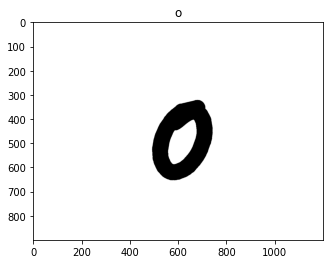

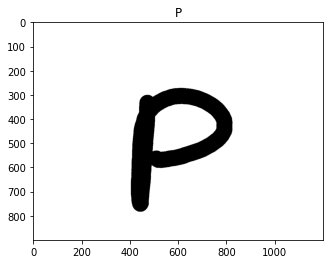

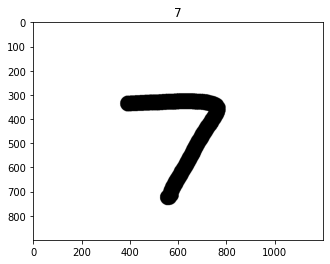

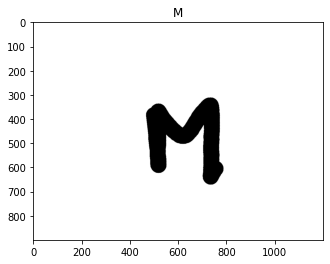

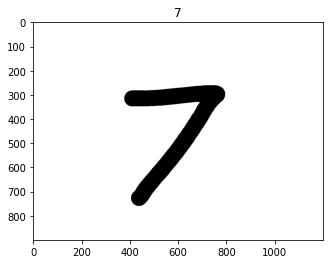

In [9]:
print("Prediction mapping: ", training_data_frame.class_indices)
pred = cnn.predict(test_data_frame)

# switcher shows our network mapping to the prediction
mapper = {
            0: "0", 1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7", 8: "8", 9: "9", 10: "A",
            11: "B", 12: "C", 13: "D", 14: "E", 15: "F", 16: "G", 17: "H", 18: "I", 19: "J", 20: "K",
            21: "L", 22: "M", 23: "N", 24: "O", 25: "P", 26: "Q", 27: "R", 28: "S", 29: "T", 30: "U",
            31: "V", 32: "W", 33: "X", 34: "Y", 35: "Z", 36: "a", 37: "b", 38: "c", 39: "d", 40: "e",
            41: "f", 42: "g", 43: "h", 44: "i", 45: "j", 46: "k", 47: "l", 48: "m", 49: "n", 50: "o",
            51: "p", 52: "q", 53: "r", 54: "s", 55: "t", 56: "u", 57: "v", 58: "w", 59: "x", 60: "y",
            61: "z"}

predict_data_frame = pd.DataFrame(pred)
maxIndex = list(predict_data_frame.idxmax(axis=1))
print("Max index: ", maxIndex)
for i in range(len(test_set)):
    image = img.imread(path + '/' + test_set.at[i, 'image'])
    plt.title(mapper.get(maxIndex[i], "error"))
    plt.imshow(image)
    plt.show()

In [10]:
cnn.save("model.h5")

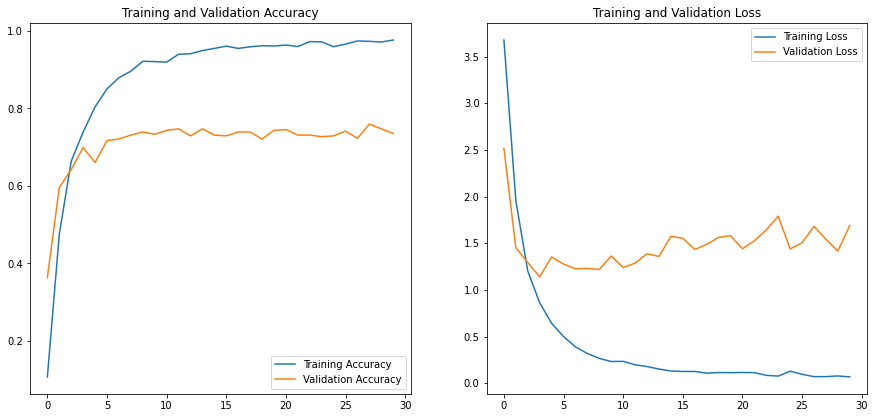

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [12]:
test_steps_per_epoch = np.math.ceil(test_data_frame.samples / test_data_frame.batch_size)
predictions =cnn.predict_generator(test_data_frame, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

/var/folders/x7/j_ctrz6j18d87v7lg0nj1bgh0000gn/T/ipykernel_46127/1922424895.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions =cnn.predict_generator(test_data_frame, steps=test_steps_per_epoch)


In [13]:
true_classes = test_data_frame.classes

In [14]:
class_labels = list(test_data_frame.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels*2)
print(report) 

              precision    recall  f1-score   support

           7       0.00      0.00      0.00       2.0
           M       0.00      0.00      0.00       1.0
           o       0.00      0.00      0.00       1.0
           p       0.00      0.00      0.00       1.0
           7       0.00      0.00      0.00       0.0
           M       0.00      0.00      0.00       0.0
           o       0.00      0.00      0.00       0.0
           p       0.00      0.00      0.00       0.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0



/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shivanshi/opt/anaconda3/envs/env_tf/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg